In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
seattle_train = pd.read_csv('seattle_train.csv')
seattle_test = pd.read_csv('seattle_test.csv')

In [66]:
seattle_train.head()

,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True
2,2,1948-01-03,0.42,45,35,True
3,3,1948-01-04,0.31,45,34,True
4,4,1948-01-05,0.17,45,32,True


In [67]:
seattle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


In [68]:
seattle_train.isna().sum()

Id      0
DATE    0
PRCP    2
TMAX    0
TMIN    0
RAIN    2
dtype: int64

In [69]:
seattle_train['RAIN'] = seattle_train['RAIN'].fillna(seattle_train['RAIN'].mode()[0])
seattle_train['PRCP'].fillna(seattle_train['PRCP'].median(), inplace = True)

In [70]:
seattle_train['RAIN'].value_counts()

False    11773
True      8667
Name: RAIN, dtype: int64

In [71]:
print('Tmax:', seattle_train['TMAX'].min())
print('Tmax:', seattle_train['TMAX'].max())

Tmax: 4
Tmax: 100


In [72]:
print('Tmin:', seattle_train['TMIN'].min())
print('Tmin:', seattle_train['TMIN'].max())

Tmin: 0
Tmin: 69


In [73]:
print('Precipitation Max :', seattle_train['PRCP'].min())
print('Precipiatation Min:', seattle_train['PRCP'].max())

Precipitation Max : 0.0
Precipiatation Min: 5.02


In [74]:
seattle_train['DATE'] = pd.to_datetime(seattle_train['DATE'], format='%Y/%m/%d')

In [75]:
seattle_train['DATE'].dt.year

0        1948
1        1948
2        1948
3        1948
4        1948
         ... 
20435    2003
20436    2003
20437    2003
20438    2003
20439    2003
Name: DATE, Length: 20440, dtype: int64

In [76]:
seattle_train['DATE'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
20435    12
20436    12
20437    12
20438    12
20439    12
Name: DATE, Length: 20440, dtype: int64

In [77]:
seattle_train['DATE'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
20435    13
20436    14
20437    15
20438    16
20439    17
Name: DATE, Length: 20440, dtype: int64

In [78]:
seattle_train['Year'] = seattle_train['DATE'].dt.year
seattle_train['Month'] = seattle_train['DATE'].dt.month
seattle_train['Day'] = seattle_train['DATE'].dt.day

In [79]:
seattle_train.head()

,Id,DATE,PRCP,TMAX,TMIN,RAIN,Year,Month,Day
0,0,1948-01-01,0.47,51,42,True,1948,1,1
1,1,1948-01-02,0.59,45,36,True,1948,1,2
2,2,1948-01-03,0.42,45,35,True,1948,1,3
3,3,1948-01-04,0.31,45,34,True,1948,1,4
4,4,1948-01-05,0.17,45,32,True,1948,1,5


In [80]:

seattle_train.drop(['Id', 'DATE'], axis = 1, inplace = True)

In [81]:
seattle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    20440 non-null  float64
 1   TMAX    20440 non-null  int64  
 2   TMIN    20440 non-null  int64  
 3   RAIN    20440 non-null  bool   
 4   Year    20440 non-null  int64  
 5   Month   20440 non-null  int64  
 6   Day     20440 non-null  int64  
dtypes: bool(1), float64(1), int64(5)
memory usage: 978.2 KB


<AxesSubplot:xlabel='RAIN', ylabel='TMAX'>

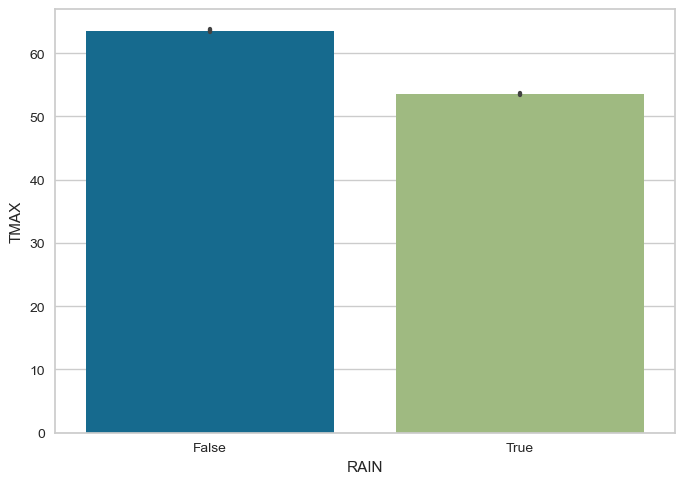

In [82]:
sns.barplot(data = seattle_train, x = 'RAIN', y = 'TMAX')

<AxesSubplot:xlabel='RAIN', ylabel='TMIN'>

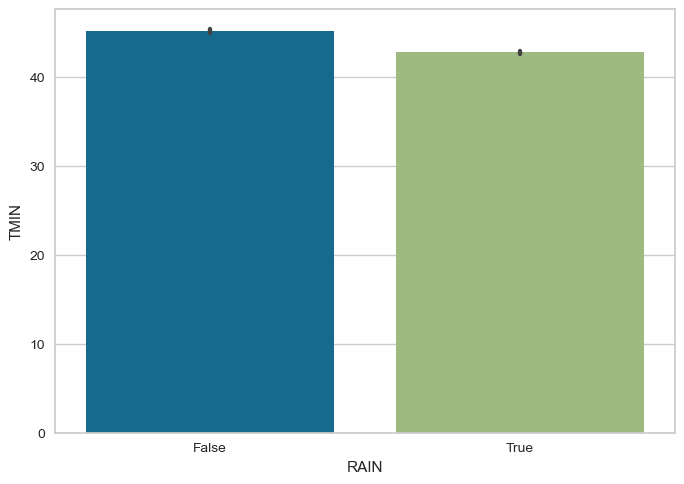

In [83]:
sns.barplot(data = seattle_train, x = 'RAIN', y = 'TMIN')

<AxesSubplot:xlabel='PRCP', ylabel='TMAX'>

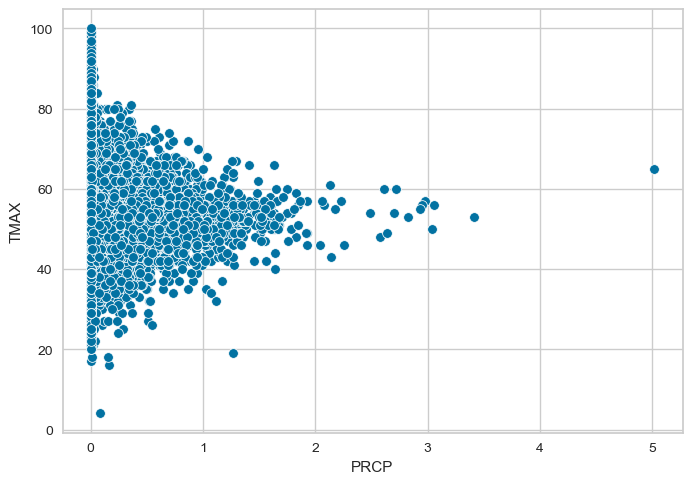

In [84]:
sns.scatterplot(data = seattle_train, x = 'PRCP', y = 'TMAX')

<AxesSubplot:xlabel='PRCP', ylabel='TMIN'>

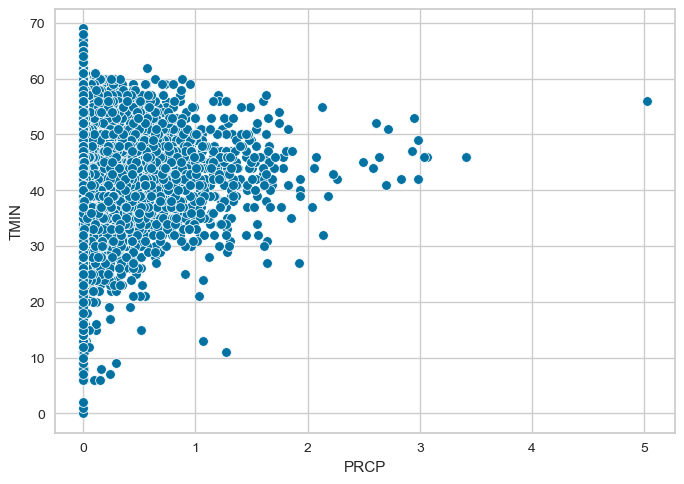

In [85]:
sns.scatterplot(data = seattle_train, x = 'PRCP', y = 'TMIN')

<AxesSubplot:xlabel='Year', ylabel='PRCP'>

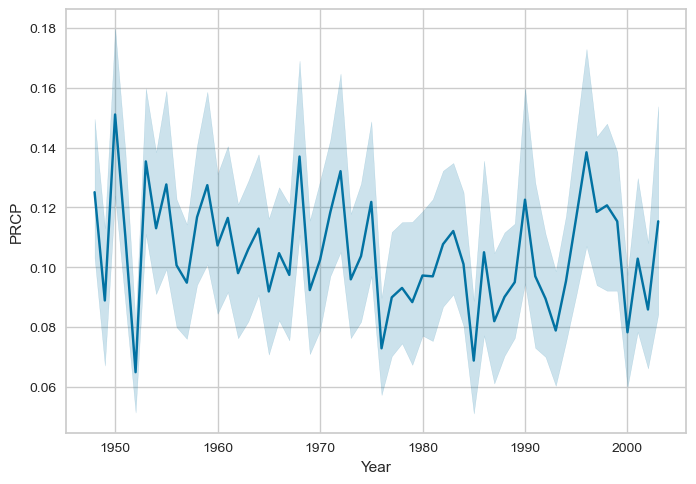

In [86]:
sns.lineplot(data= seattle_train, x = 'Year', y ='PRCP')

<AxesSubplot:xlabel='RAIN', ylabel='Year'>

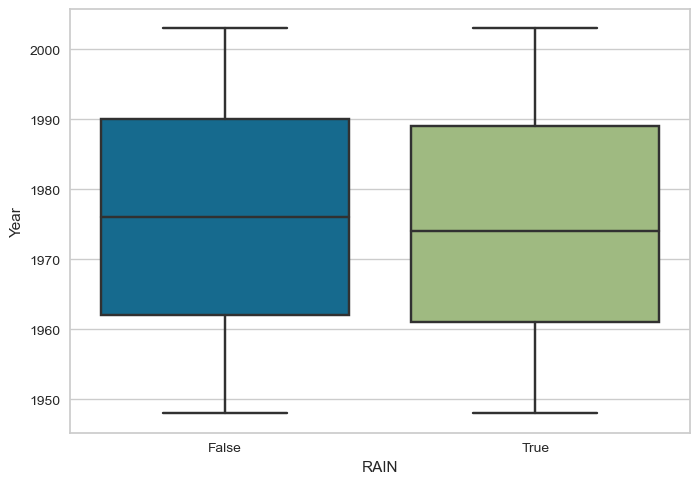

In [87]:
sns.boxplot(data = seattle_train, x = 'RAIN', y = 'Year')

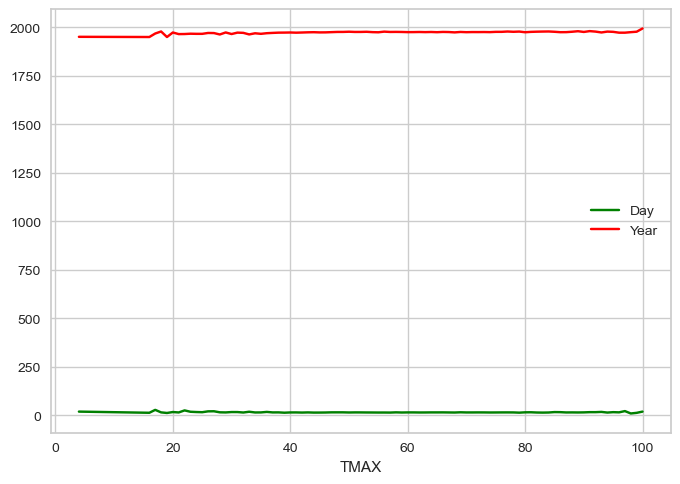

In [88]:
seattle_train.groupby(by=['TMAX'])['Day'].mean().plot.line(color='green')
seattle_train.groupby(by=['TMAX'])['Year'].mean().plot.line(color='red')
plt.legend()

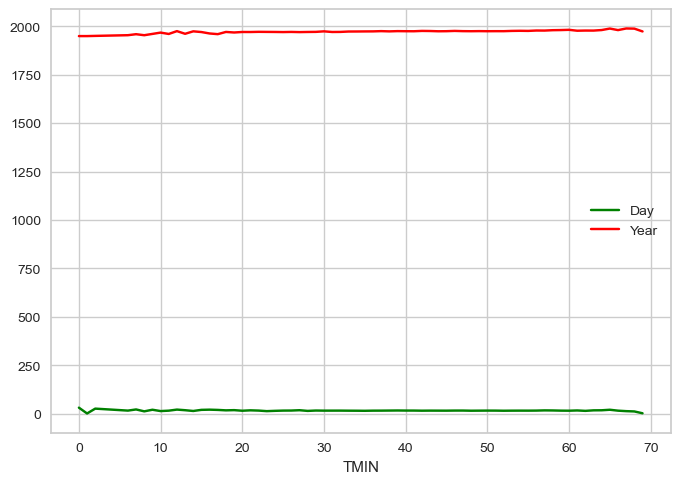

In [89]:
seattle_train.groupby(by=['TMIN'])['Day'].mean().plot.line(color='green')
seattle_train.groupby(by=['TMIN'])['Year'].mean().plot.line(color='red')
plt.legend()

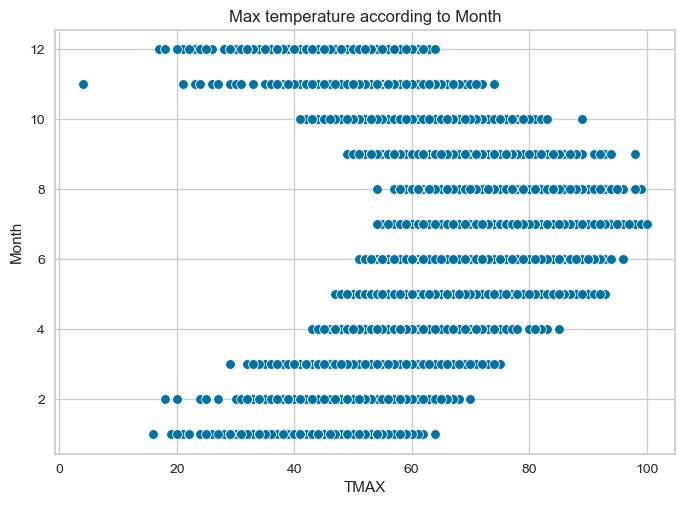

In [90]:
sns.scatterplot(x='TMAX', y='Month', data=seattle_train, palette = "rocket")
plt.title('Max temperature according to Month')
plt.show()

<AxesSubplot:xlabel='Day', ylabel='TMAX'>

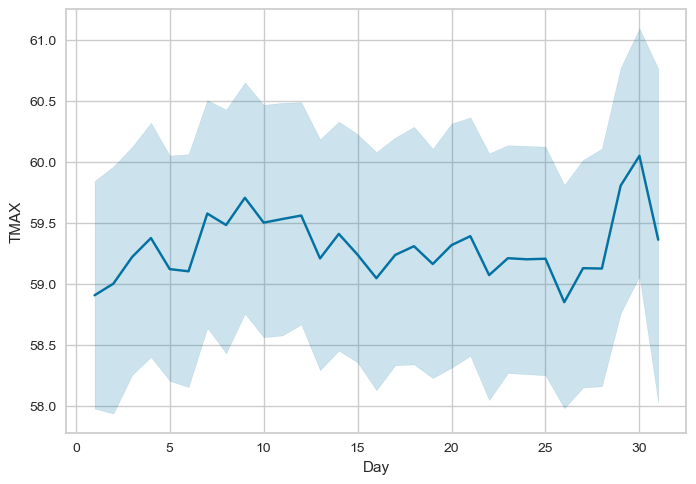

In [91]:
sns.lineplot(data= seattle_train, x = 'Day', y ='TMAX')

<AxesSubplot:xlabel='Day', ylabel='TMIN'>

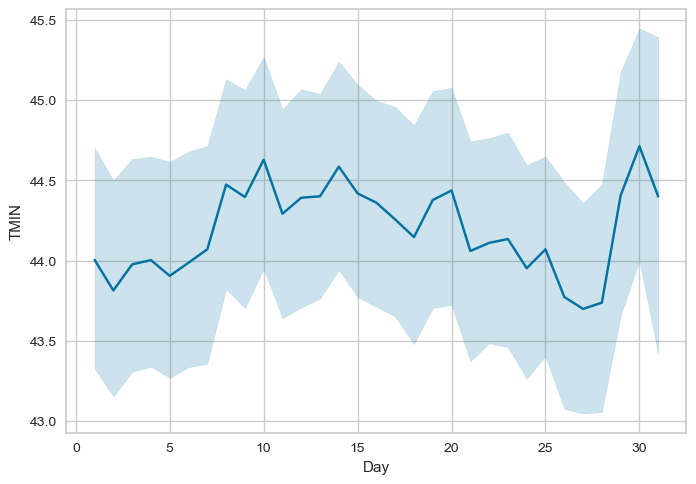

In [92]:
sns.lineplot(data= seattle_train, x = 'Day', y ='TMIN')

<AxesSubplot:xlabel='Month', ylabel='TMAX'>

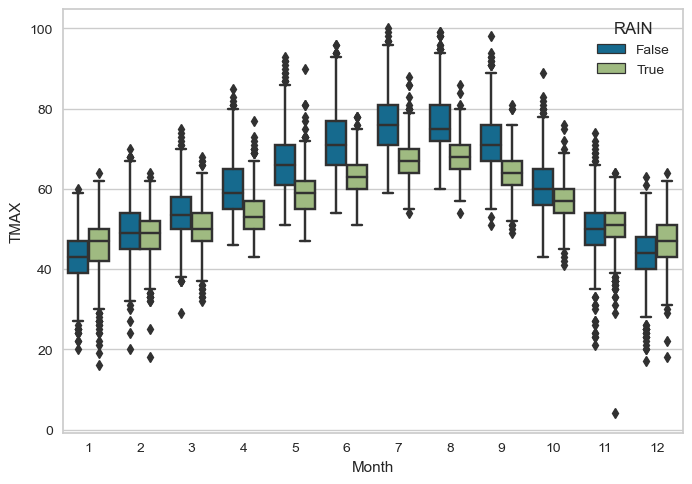

In [93]:
sns.boxplot(data = seattle_train, x = 'Month', y = 'TMAX', hue = 'RAIN')

<AxesSubplot:xlabel='Month', ylabel='TMIN'>

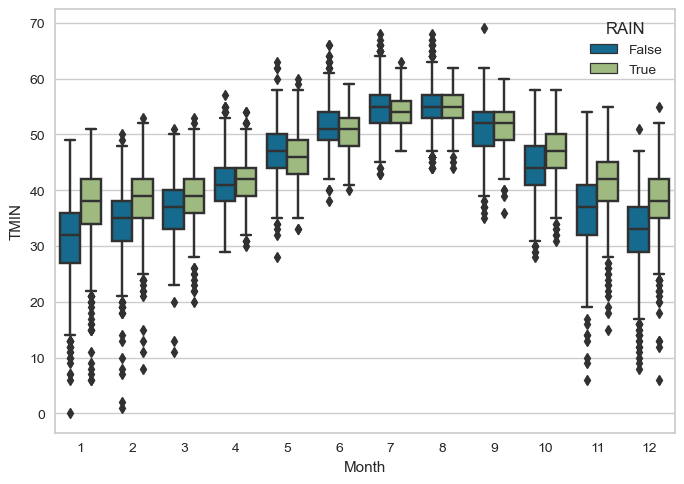

In [94]:

sns.boxplot(data = seattle_train, x = 'Month', y = 'TMIN', hue = 'RAIN')

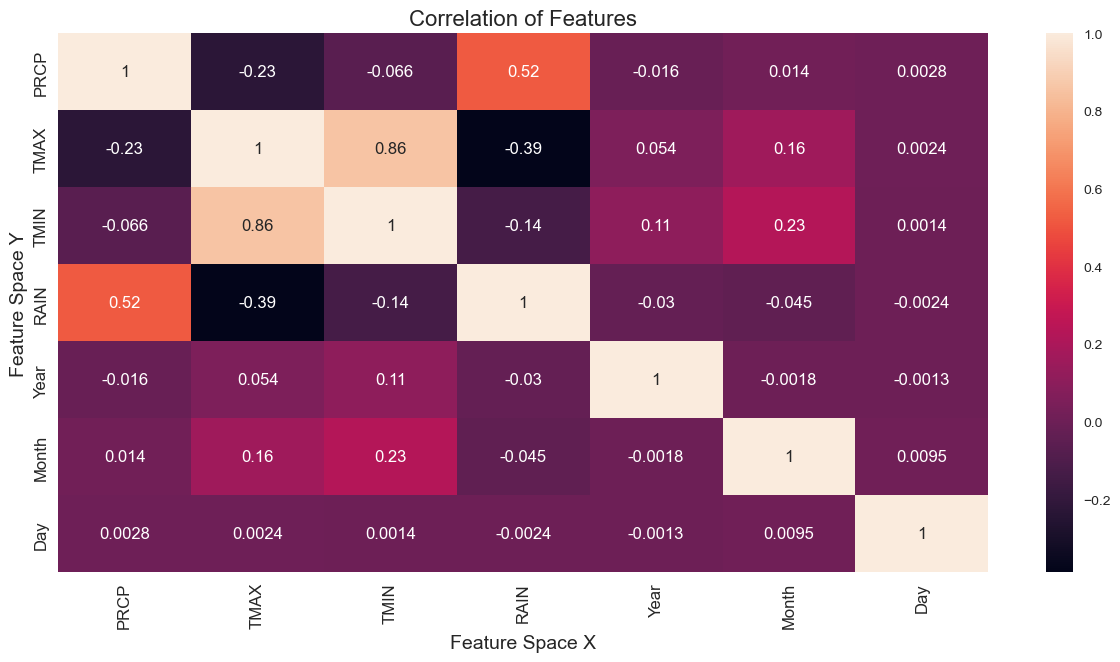

In [95]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=seattle_train.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()


In [96]:
#seattle_train.drop(['TMAX', 'TMIN'], axis = 1, inplace = True)

PRCP


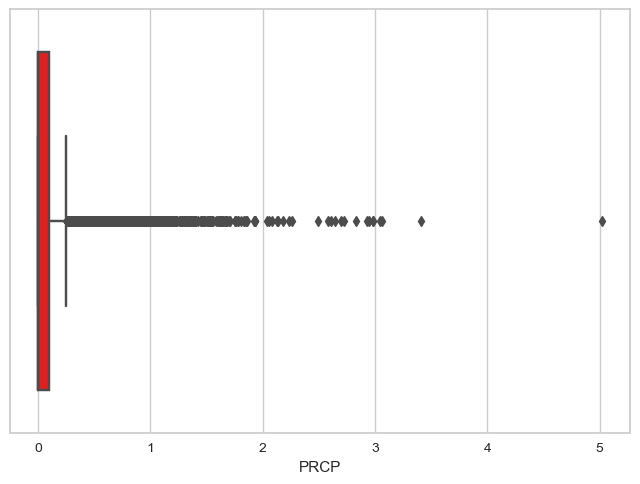

TMAX


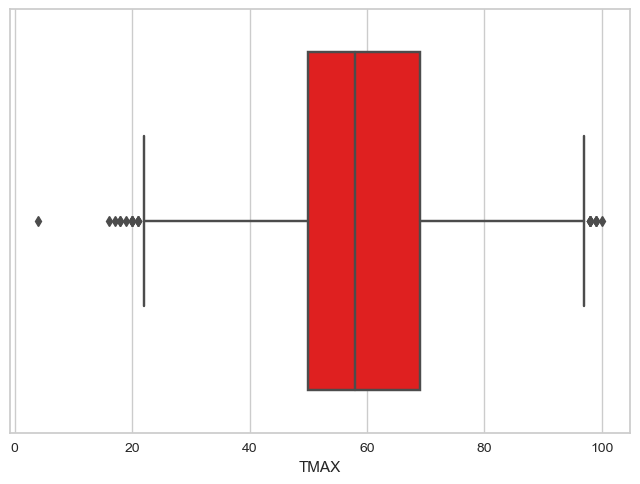

TMIN


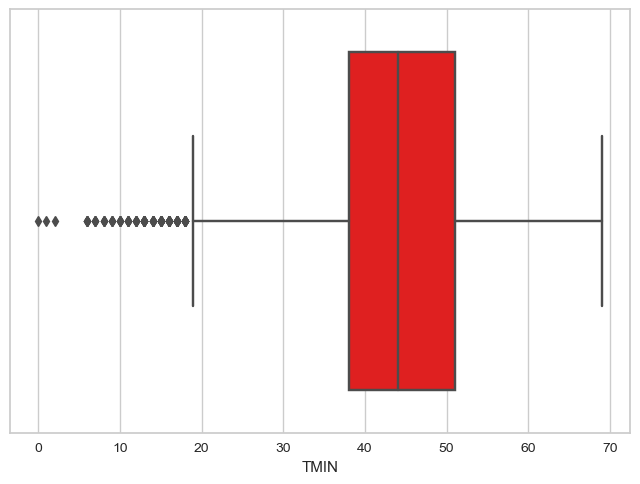

In [97]:
for col in seattle_train.iloc[:,:3].columns:
    print(col)
    sns.boxplot(x = seattle_train[col], data = seattle_train, color = 'red')
    plt.show()

In [98]:
def Outlier(var):
    for x in var.iloc[:, :3].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(seattle_train)

PRCP


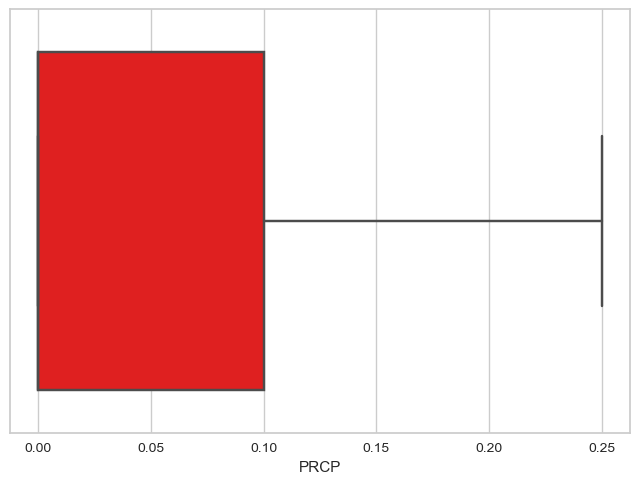

TMAX


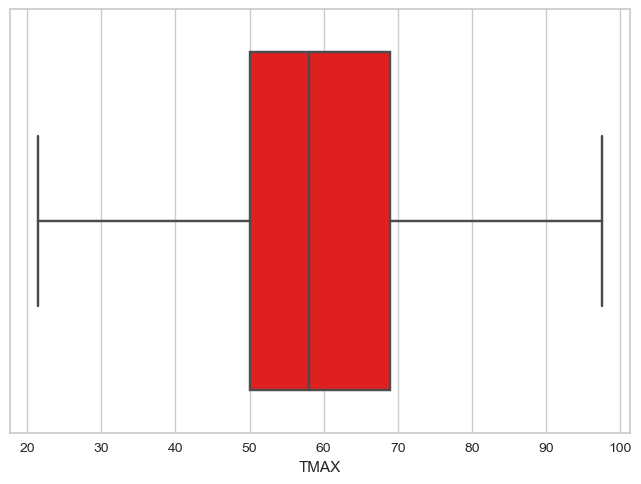

TMIN


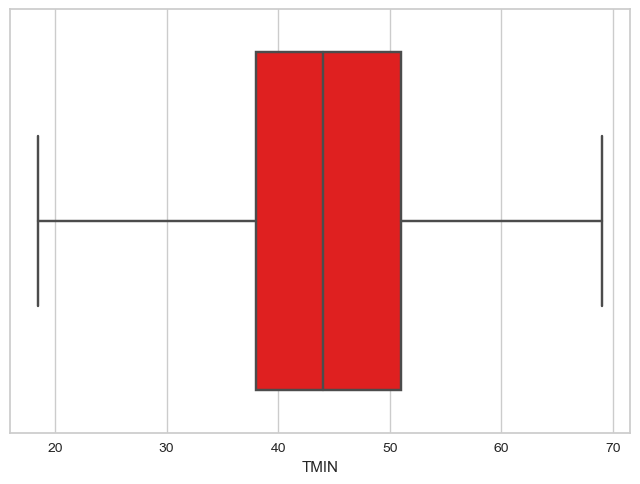

In [99]:
for col in seattle_train.iloc[:,:3].columns:
    print(col)
    sns.boxplot(x = seattle_train[col], data = seattle_train, color = 'red')
    plt.show()

In [100]:
df_train.drop(['Year', 'Month', 'Day'], axis = 1, inplace = True)

In [101]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#df_train['RAIN'] = le.fit_transform(df_train['RAIN'])

In [102]:
df_train.head()

,PRCP,TMAX,TMIN,RAIN
0,0.25,51.0,42.0,True
1,0.25,45.0,36.0,True
2,0.25,45.0,35.0,True
3,0.25,45.0,34.0,True
4,0.17,45.0,32.0,True


# Train-Test Split :

In [103]:
x = df_train.drop('RAIN', axis = 1)
y = df_train['RAIN']

In [104]:
x

,PRCP,TMAX,TMIN
0,0.25,51.0,42.0
1,0.25,45.0,36.0
2,0.25,45.0,35.0
3,0.25,45.0,34.0
4,0.17,45.0,32.0
...,...,...,...
20435,0.25,48.0,39.0
20436,0.07,43.0,36.0
20437,0.01,45.0,38.0
20438,0.07,51.0,41.0


In [105]:
y

0         True
1         True
2         True
3         True
4         True
         ...  
20435     True
20436     True
20437     True
20438     True
20439    False
Name: RAIN, Length: 20440, dtype: bool

In [106]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30, random_state = 42, stratify = y)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14308, 3)
(6132, 3)
(14308,)
(6132,)


In [108]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [109]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Freature Selection :

In [110]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 1
Threshold set by Model: 0.33
Important Features: ['PRCP']


# Feature Importance :

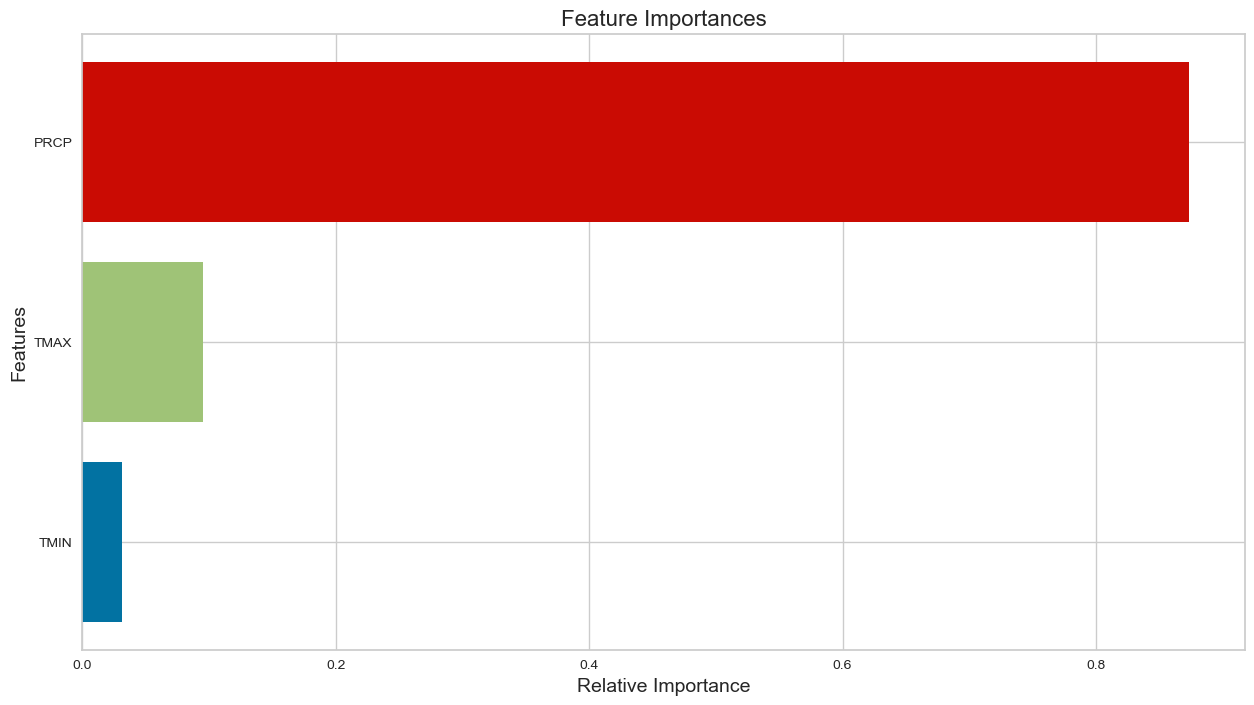

In [111]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

# Modelling :

# 1.Logistic Regression :

In [112]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [113]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.9851831143416271

In [114]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

0.9867906066536204

In [115]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

In [116]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

# Model Evaluation :

In [117]:
print('                    Training Report           ')
modelEval(y_train, y_pred_train)

                    Training Report           
[[8241    0]
 [ 212 5855]]
The accuracy of the Model is : 0.9851831143416271
              precision    recall  f1-score   support

       False       0.97      1.00      0.99      8241
        True       1.00      0.97      0.98      6067

    accuracy                           0.99     14308
   macro avg       0.99      0.98      0.98     14308
weighted avg       0.99      0.99      0.99     14308



In [118]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_test)

               Testing Report                            
[[3532    0]
 [  81 2519]]
The accuracy of the Model is : 0.9867906066536204
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3532
        True       1.00      0.97      0.98      2600

    accuracy                           0.99      6132
   macro avg       0.99      0.98      0.99      6132
weighted avg       0.99      0.99      0.99      6132



# 2. Decision Tree Classifier :

In [119]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [120]:
acc_Dtree_train = tree.score(x_train, y_train)
acc_Dtree_train

1.0

In [121]:
acc_Dtree_test = tree.score(x_test, y_test)
acc_Dtree_test

1.0

In [122]:
y_pred_dt_train = tree.predict(x_train)
y_pred_dt_test = tree.predict(x_test)

# Model Evaluation :

In [123]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[8241    0]
 [   0 6067]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8241
        True       1.00      1.00      1.00      6067

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [124]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[3532    0]
 [   0 2600]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3532
        True       1.00      1.00      1.00      2600

    accuracy                           1.00      6132
   macro avg       1.00      1.00      1.00      6132
weighted avg       1.00      1.00      1.00      6132



# 2 . AdaBoost Classifier :

In [125]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [126]:
acc_ada_train = ada_class.score(x_train, y_train)
acc_ada_train

1.0

In [127]:
acc_ada_test = ada_class.score(x_test, y_test)
acc_ada_test

1.0

In [128]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

# Model Evaluation :

In [129]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[8241    0]
 [   0 6067]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8241
        True       1.00      1.00      1.00      6067

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [130]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[3532    0]
 [   0 2600]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3532
        True       1.00      1.00      1.00      2600

    accuracy                           1.00      6132
   macro avg       1.00      1.00      1.00      6132
weighted avg       1.00      1.00      1.00      6132



# 3. Random Forest Classifier :

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [132]:
acc_randForest_train = clf_randF.score(x_train, y_train)
acc_randForest_train

1.0

In [133]:
acc_randForest_test = clf_randF.score(x_test, y_test)
acc_randForest_test

1.0

In [134]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

# Model Evaluation :

In [135]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[8241    0]
 [   0 6067]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8241
        True       1.00      1.00      1.00      6067

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [136]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[3532    0]
 [   0 2600]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3532
        True       1.00      1.00      1.00      2600

    accuracy                           1.00      6132
   macro avg       1.00      1.00      1.00      6132
weighted avg       1.00      1.00      1.00      6132



# Bagging Classifier on Random Forest :

In [137]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [138]:
acc_bagRf_train = bag_clf.score(x_train, y_train)
acc_bagRf_train

1.0

In [139]:
acc_bagRf_test = bag_clf.score(x_test, y_test)
acc_bagRf_test

1.0

In [140]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [141]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[8241    0]
 [   0 6067]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8241
        True       1.00      1.00      1.00      6067

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [142]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[3532    0]
 [   0 2600]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3532
        True       1.00      1.00      1.00      2600

    accuracy                           1.00      6132
   macro avg       1.00      1.00      1.00      6132
weighted avg       1.00      1.00      1.00      6132



In [143]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier', 'ADABoost Classifier',
                                 'Random Forest Classifier', 'Bagging Classifier'],
                       'Training Score': [acc_log_train, acc_Dtree_train, acc_ada_train,
                                         acc_randForest_train, acc_bagRf_train],
                       'Testing Score': [acc_log_test, acc_Dtree_test, acc_ada_test, acc_randForest_test, acc_bagRf_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

,Model,Training Score,Testing Score
0,Decision Tree Classifier,1.000000,1.000000
1,ADABoost Classifier,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000
3,Bagging Classifier,1.000000,1.000000
4,Logistic Regression,0.985183,0.986791


# Kfold Cross Validation :

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
classifiers = []

classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())

In [146]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

In [147]:
cv_results

[array([0.98602376, 0.98113208, 0.98532495, 0.97973445, 0.97833683,
        0.98881901, 0.98602376, 0.98742138, 0.97902098, 0.98601399]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [148]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [149]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Random Forest', 'Decision Tree', 'Bagging Classifier', 'ADABoost Classifier', 'Logistic Regression']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,1.000000,0.00000,Decision Tree
1,1.000000,0.00000,Bagging Classifier
2,1.000000,0.00000,ADABoost Classifier
3,1.000000,0.00000,Logistic Regression
4,0.983785,0.00363,Random Forest


# Hyperparameter tuning using GridSearch on Decision Tree :

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
clf_tree = DecisionTreeClassifier()

In [152]:
param_dict = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1,10),
             'min_samples_split':range(1,10),
             'min_samples_leaf': range(1,5)}

In [153]:
grid = GridSearchCV(clf_tree, param_grid = param_dict, cv = 10, verbose = 1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [154]:
final_features = grid.best_estimator_
final_features

DecisionTreeClassifier(max_depth=1)

In [155]:
clf_tree = DecisionTreeClassifier(max_depth=1)

In [156]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [157]:
y_gridT_train = clf_tree.predict(x_train)
y_gridT_test = clf_tree.predict(x_test)

# Model Evaluation :

In [158]:
    print('                    Training Report           ')
modelEval(y_train, y_gridT_train)                                                                         

                    Training Report           
[[8241    0]
 [   0 6067]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8241
        True       1.00      1.00      1.00      6067

    accuracy                           1.00     14308
   macro avg       1.00      1.00      1.00     14308
weighted avg       1.00      1.00      1.00     14308



In [159]:
print('               Testing Report                            ')
modelEval(y_test, y_gridT_test)

               Testing Report                            
[[3532    0]
 [   0 2600]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3532
        True       1.00      1.00      1.00      2600

    accuracy                           1.00      6132
   macro avg       1.00      1.00      1.00      6132
weighted avg       1.00      1.00      1.00      6132



In [336]:
seattle_test = pd.read_csv('seattle_test.csv')

In [337]:
seattle_test.head()

,Id,DATE,PRCP,TMAX,TMIN
0,20440,2003-12-18,0.00,54,37
1,20441,2003-12-19,0.14,51,38
2,20442,2003-12-20,0.13,48,44
3,20443,2003-12-21,0.01,51,38
4,20444,2003-12-22,0.00,53,35


In [338]:
y_predictions_test = seattle_test

In [339]:
seattle_test.drop('DATE', axis = 1, inplace = True)

In [340]:
seattle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5110 non-null   int64  
 1   PRCP    5110 non-null   float64
 2   TMAX    5110 non-null   int64  
 3   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 159.8 KB


PRCP


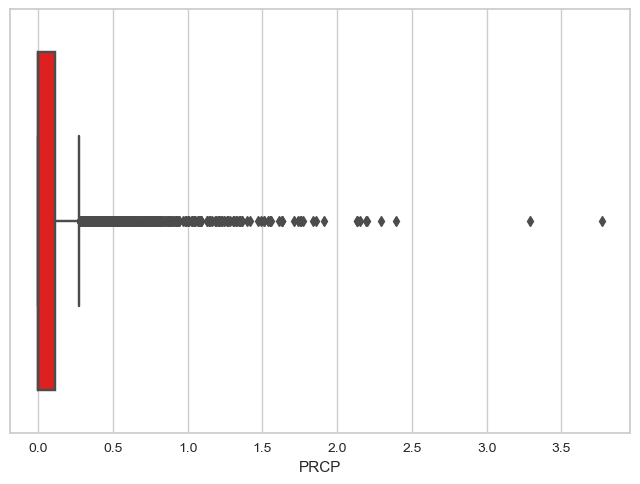

TMAX


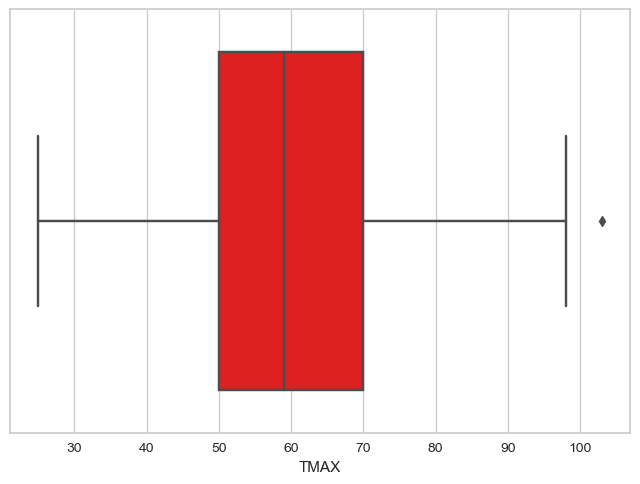

In [341]:
for col in seattle_test.iloc[:,1:3].columns:
    print(col)
    sns.boxplot(x = seattle_test[col], data = seattle_test, color = 'red')
    plt.show()

In [342]:
def Outlier(var):
    for x in var.iloc[:, 1:3].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(seattle_test)

PRCP


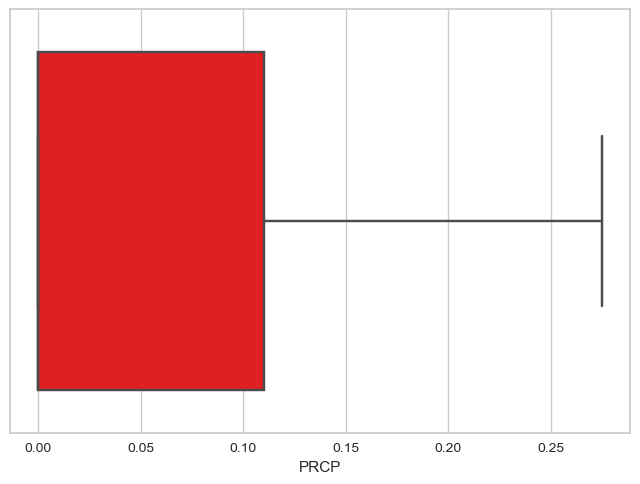

TMAX


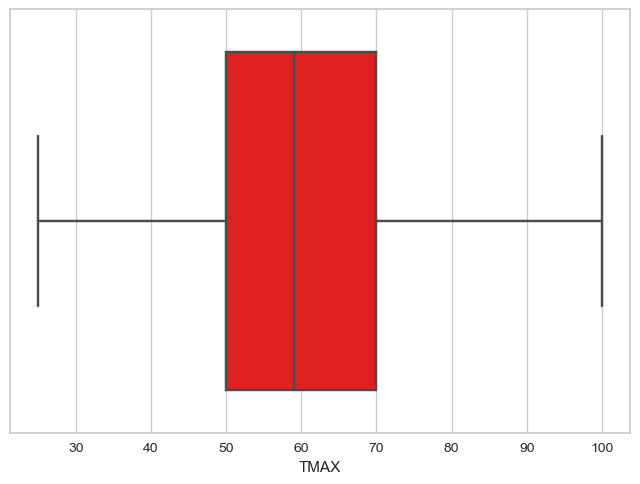

In [343]:
for col in seattle_test.iloc[:,1:3].columns:
    print(col)
    sns.boxplot(x = seattle_test[col], data = seattle_test, color = 'red')
    plt.show()

In [344]:
df_test.head()

,Id,PRCP,TMAX,TMIN
0,20440,0.00,54.0,37
1,20441,0.14,51.0,38
2,20442,0.13,48.0,44
3,20443,0.01,51.0,38
4,20444,0.00,53.0,35


In [345]:
df_test.drop('Id', axis = 1, inplace = True)

In [346]:
df_test = scaler.transform(df_test)

In [347]:
predictions = clf_tree.predict(df_test)

In [348]:
predictions

array([False,  True,  True, ..., False, False, False])

In [349]:
y_predictions_test['RAIN'] = predictions

In [350]:
y_predictions_test.head()

,PRCP,TMAX,TMIN,RAIN
0,0.00,54.0,37,False
1,0.14,51.0,38,True
2,0.13,48.0,44,True
3,0.01,51.0,38,True
4,0.00,53.0,35,False


In [351]:
y_predictions_test['RAIN'].replace({False: 0, True: 1}, inplace=True)

In [353]:
y_predictions_test

,PRCP,TMAX,TMIN,RAIN
0,0.00,54.0,37,0
1,0.14,51.0,38,1
2,0.13,48.0,44,1
3,0.01,51.0,38,1
4,0.00,53.0,35,0
...,...,...,...,...
5105,0.00,49.0,34,0
5106,0.00,49.0,29,0
5107,0.00,46.0,32,0
5108,0.00,48.0,34,0


In [354]:
y_predictions_test.to_csv('submission_seattle.csv', index = False, header = False)